<a href="https://colab.research.google.com/github/Anantbir-S/AER850_Project2/blob/main/Project2Progress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
from google.colab import drive
import os

# Mount Google Drive (if necessary)
drive.mount('/content/drive')

# Step 1: Data Processing
# Define image dimensions
input_image_shape = (500, 500, 3)  # (Width, Height, Channels)

# Define the base directory (use relative paths)
base_dir = '/content/drive/MyDrive/AER850 Project 2/Project 2 Data/Data'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')

# Data augmentation for training images
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    fill_mode='nearest'
)

# Only rescaling for validation images
validation_datagen = ImageDataGenerator(rescale=1./255)

# Create image data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(500, 500),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(500, 500),
    batch_size=32,
    class_mode='categorical'
)

# Step 2: Neural Network Architecture Design
inputs = Input(shape=input_image_shape)

# Convolutional layers with Batch Normalization, LeakyReLU Activation, and L2 Regularization
x = Conv2D(32, (3, 3), kernel_regularizer=tf.keras.regularizers.l2(0.001))(inputs)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(256, (3, 3), kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = MaxPooling2D((2, 2))(x)

# Flatten and Dense layers with Dropout and L2 Regularization
x = Flatten()(x)
x = Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

# Output layer for multi-class classification with softmax activation
outputs = Dense(3, activation='softmax')(x)  # Adjust number of classes if needed

# Step 3: Compile the Model with optimized hyperparameters
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=Adam(learning_rate=0.0005),  # Start with a lower learning rate
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks for early stopping and learning rate adjustment
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Step 4: Train the model and evaluate performance
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20,  # Adjust as needed
    callbacks=[early_stopping, reduce_lr]
)

# Plot training and validation accuracy/loss
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


Mounted at /content/drive
Found 1942 images belonging to 3 classes.
Found 431 images belonging to 3 classes.
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


61/61 ━━━━━━━━━━━━━━━━━━━━ 2799s 45s/step - accuracy: 0.4756 - loss: 3.2318 - val_accuracy: 0.4919 - val_loss: 3.1583 - learning_rate: 5.0000e-04
Epoch 2/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 2747s 44s/step - accuracy: 0.5804 - loss: 2.5528 - val_accuracy: 0.4617 - val_loss: 2.3004 - learning_rate: 5.0000e-04
Epoch 3/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 2747s 44s/step - accuracy: 0.6114 - loss: 2.0745 - val_accuracy: 0.4687 - val_loss: 2.1224 - learning_rate: 5.0000e-04
Epoch 4/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 2729s 44s/step - accuracy: 0.5849 - loss: 1.8815 - val_accuracy: 0.5777 - val_loss: 1.7663 - learning_rate: 5.0000e-04
Epoch 5/20
13/61 ━━━━━━━━━━━━━━━━━━━━ 33:59 42s/step - accuracy: 0.6336 - loss: 1.5633

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
from google.colab import drive
import os

# Mount Google Drive (if necessary)
drive.mount('/content/drive')

# Step 1: Data Processing
# Define image dimensions
input_image_shape = (500, 500, 3)  # (Width, Height, Channels)

# Define the base directory (use relative paths)
base_dir = '/content/drive/MyDrive/AER850 Project 2/Project 2 Data/Data'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')

# Data augmentation for training images
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    fill_mode='nearest'
)

# Only rescaling for validation images
validation_datagen = ImageDataGenerator(rescale=1./255)

# Create image data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(500, 500),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(500, 500),
    batch_size=32,
    class_mode='categorical'
)

# Step 2: Neural Network Architecture Design
inputs = Input(shape=input_image_shape)

# Convolutional layers with Batch Normalization, LeakyReLU Activation, and L2 Regularization
x = Conv2D(16, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(inputs)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(32, (3, 3), kernel_regularizer=tf.keras.regularizers.l2(0.001))(inputs)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = MaxPooling2D((2, 2))(x)

# Flatten and Dense layers with Dropout and L2 Regularization
x = Flatten()(x)
x = Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

# Output layer for multi-class classification with softmax activation
outputs = Dense(3, activation='softmax')(x)  # Adjust number of classes if needed

# Step 3: Compile the Model with optimized hyperparameters
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=Adam(learning_rate=0.0005),  # Start with a lower learning rate
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks for early stopping and learning rate adjustment
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Step 4: Train the model and evaluate performance
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=5,  # Adjust as needed
    callbacks=[early_stopping, reduce_lr]
)

# Plot training and validation accuracy/loss
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 1942 images belonging to 3 classes.
Found 431 images belonging to 3 classes.
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 1942 images belonging to 3 classes.
Found 431 images belonging to 3 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


61/61 ━━━━━━━━━━━━━━━━━━━━ 1455s 23s/step - accuracy: 0.5022 - loss: 2.5901 - val_accuracy: 0.3921 - val_loss: 2.3333 - learning_rate: 1.0000e-04
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 1392s 22s/step - accuracy: 0.5717 - loss: 2.0392 - val_accuracy: 0.3944 - val_loss: 2.1704 - learning_rate: 1.0000e-04
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 1368s 21s/step - accuracy: 0.6138 - loss: 1.8734 - val_accuracy: 0.4014 - val_loss: 2.0904 - learning_rate: 1.0000e-04
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 1344s 21s/step - accuracy: 0.6248 - loss: 1.7614 - val_accuracy: 0.5012 - val_loss: 1.8440 - learning_rate: 1.0000e-04
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 1369s 22s/step - accuracy: 0.6251 - loss: 1.7018 - val_accuracy: 0.4988 - val_loss: 1.7190 - learning_rate: 1.0000e-04
Epoch 6/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 1320s 21s/step - accuracy: 0.6452 - loss: 1.6200 - val_accuracy: 0.6125 - val_loss: 1.5594 - learning_rate: 1.0000e-04
Epoch 7/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 1369s 22s/step - accuracy: 0.63

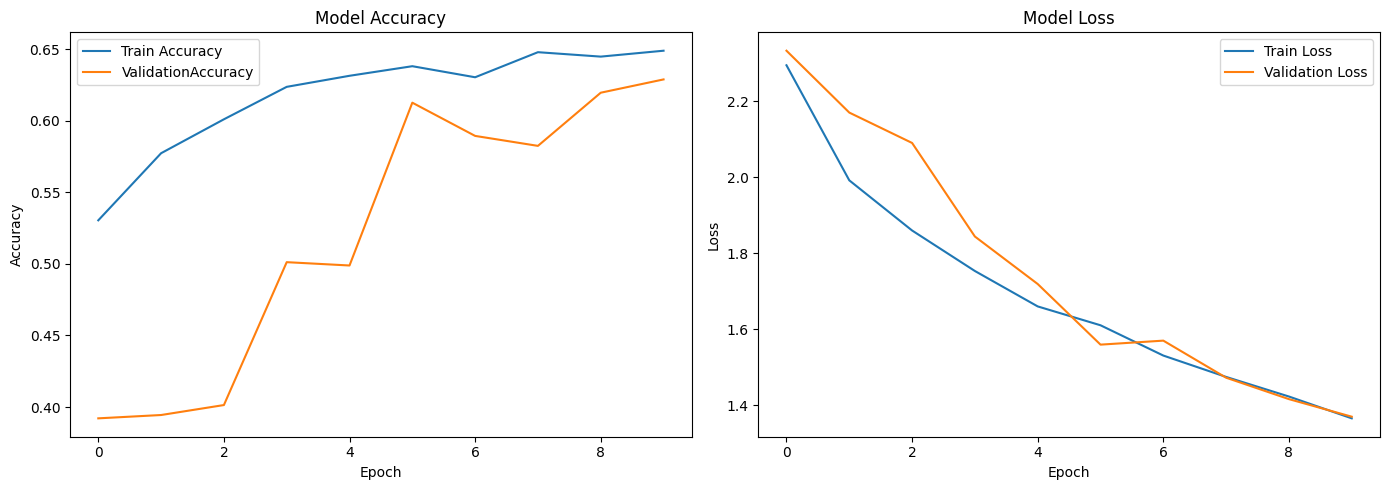

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Define image dimensions
input_image_shape = (500, 500, 3)

# Define base directory
base_dir = '/content/drive/MyDrive/AER850 Project 2/Project 2 Data/Data'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'valid')

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Create image data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(500, 500),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(500,500),
    batch_size=32,
    class_mode='categorical'
)

# Create the model
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001), input_shape=input_image_shape),
    BatchNormalization(),
    LeakyReLU(alpha=0.2),
    MaxPooling2D((2, 2)),

    Conv2D(32, (3, 3), kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    BatchNormalization(),
    LeakyReLU(alpha=0.2),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    BatchNormalization(),
    LeakyReLU(alpha=0.2),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    Dropout(0.4),
    BatchNormalization(),
    LeakyReLU(alpha=0.2),

    Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)


# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,  # Adjust epochs as needed
    callbacks=[early_stopping, reduce_lr]
)

# Plot training and validation accuracy/loss
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='ValidationAccuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')

plt.tight_layout()
plt.show()